In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
vendas = pd.read_csv('data/mes-mil-reais.csv', sep = ';')
vendas.head()

,Mês,Vendas em mil R$
0,1-Jan-2014,10
1,1-Feb-2014,20
2,1-Mar-2014,33
3,1-Apr-2014,47
4,1-May-2014,63


# Tratamento dos dados

In [70]:
vendas['mes-tratado1'] = list(map(lambda mes : mes.replace('1-', ''), vendas['Mês']))
vendas['mes-tratado2'] = list(map(lambda mes : mes.replace('20', ''), vendas['mes-tratado1']))
vendas.head()


,Mês,Vendas em mil R$,mes-tratado1,mes-tratado2
0,1-Jan-2014,10,Jan-2014,Jan-14
1,1-Feb-2014,20,Feb-2014,Feb-14
2,1-Mar-2014,33,Mar-2014,Mar-14
3,1-Apr-2014,47,Apr-2014,Apr-14
4,1-May-2014,63,May-2014,May-14


In [71]:
def month_to_number(month):
    sepMes = month.split('-')
    num = ('01' if sepMes[0] == 'Jan' else
           '02' if sepMes[0] == 'Feb' else
           '03' if sepMes[0] == 'Mar' else
           '04' if sepMes[0] == 'Apr' else
           '05' if sepMes[0] == 'May' else
           '06' if sepMes[0] == 'Jun' else
           '07' if sepMes[0] == 'Jul' else
           '08' if sepMes[0] == 'Aug' else
           '09' if sepMes[0] == 'Sep' else
           '10' if sepMes[0] == 'Oct' else
           '11' if sepMes[0] == 'Nov' else '12'
          )
    return num + '/' + sepMes[1]

vendas['mes-tratado3'] = list(map(lambda mes : month_to_number(mes), vendas['mes-tratado2']))

vendas.head()

,Mês,Vendas em mil R$,mes-tratado1,mes-tratado2,mes-tratado3
0,1-Jan-2014,10,Jan-2014,Jan-14,01/14
1,1-Feb-2014,20,Feb-2014,Feb-14,02/14
2,1-Mar-2014,33,Mar-2014,Mar-14,03/14
3,1-Apr-2014,47,Apr-2014,Apr-14,04/14
4,1-May-2014,63,May-2014,May-14,05/14


# Plot das vendas de produtos em mil reais por mês

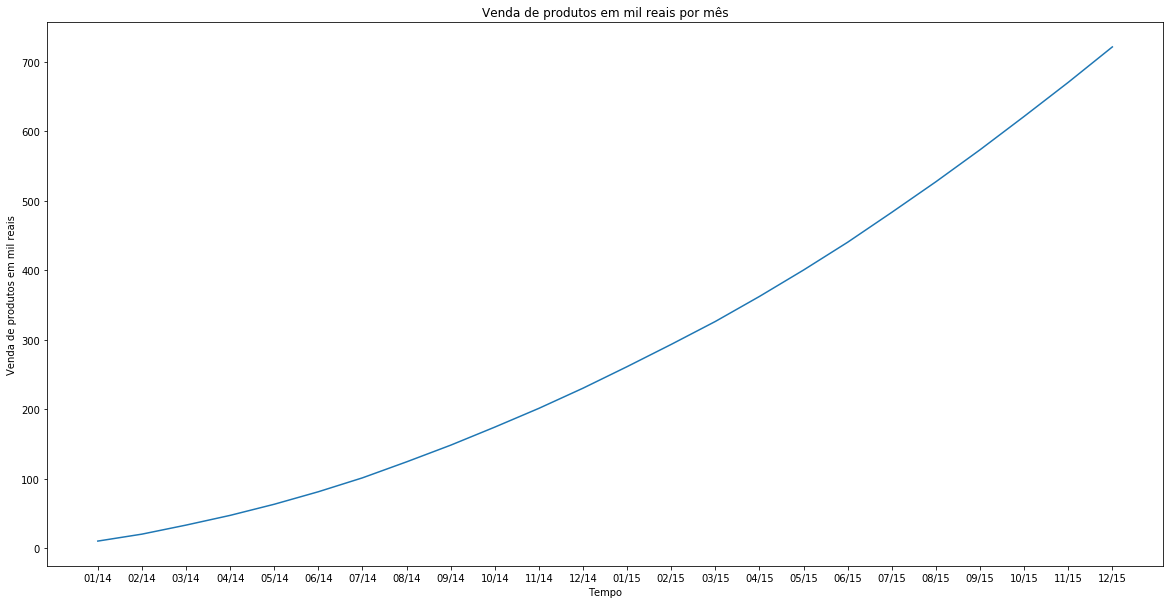

In [72]:
plt.rc('figure',figsize = (20,10) )
plt.title('Venda de produtos em mil reais por mês')
plt.xlabel('Tempo')
plt.ylabel('Venda de produtos em mil reais')
plt.plot(vendas['mes-tratado3'], vendas['Vendas em mil R$'])


# Aumento das vendas por mes

In [73]:
aumento_vendas = []
for i in range( len( vendas['Vendas em mil R$'] ) - 1 ):
    aumento_vendas.append((vendas['Vendas em mil R$'][i+1] - vendas['Vendas em mil R$'][i] ))
aumento_vendas.append(None)
vendas['Aumento das Vendas'] = aumento_vendas
vendas.tail()

,Mês,Vendas em mil R$,mes-tratado1,mes-tratado2,mes-tratado3,Aumento das Vendas
19,1-Aug-2015,527,Aug-2015,Aug-15,08/15,46.0
20,1-Sep-2015,573,Sep-2015,Sep-15,09/15,48.0
21,1-Oct-2015,621,Oct-2015,Oct-15,10/15,49.0
22,1-Nov-2015,670,Nov-2015,Nov-15,11/15,51.0
23,1-Dec-2015,721,Dec-2015,Dec-15,12/15,NaN


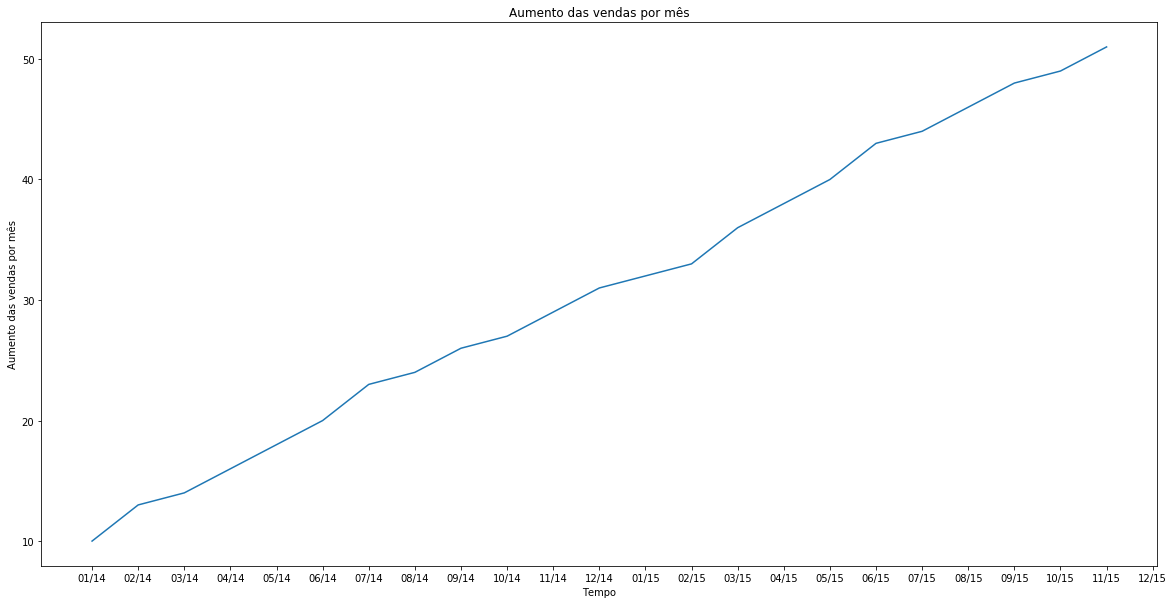

In [74]:
plt.rc('figure', figsize = (20, 10))
plt.title('Aumento das vendas por mês')
plt.xlabel('Tempo')
plt.ylabel('Aumento das vendas por mês')
plt.plot(vendas['mes-tratado3'], vendas['Aumento das Vendas'])

# Aceleração das vendas

In [75]:
aceleracao_vendas = []
for j in range( len( vendas['Aumento das Vendas'] ) - 2 ):
    aceleracao_vendas.append((vendas['Aumento das Vendas'][j+1] - vendas['Aumento das Vendas'][j] ))
aceleracao_vendas.append(None)
aceleracao_vendas.append(None)
vendas['Aceleracao das Vendas'] = aceleracao_vendas
vendas.tail()

,Mês,Vendas em mil R$,mes-tratado1,mes-tratado2,mes-tratado3,Aumento das Vendas,Aceleracao das Vendas
19,1-Aug-2015,527,Aug-2015,Aug-15,08/15,46.0,2.0
20,1-Sep-2015,573,Sep-2015,Sep-15,09/15,48.0,1.0
21,1-Oct-2015,621,Oct-2015,Oct-15,10/15,49.0,2.0
22,1-Nov-2015,670,Nov-2015,Nov-15,11/15,51.0,NaN
23,1-Dec-2015,721,Dec-2015,Dec-15,12/15,NaN,NaN


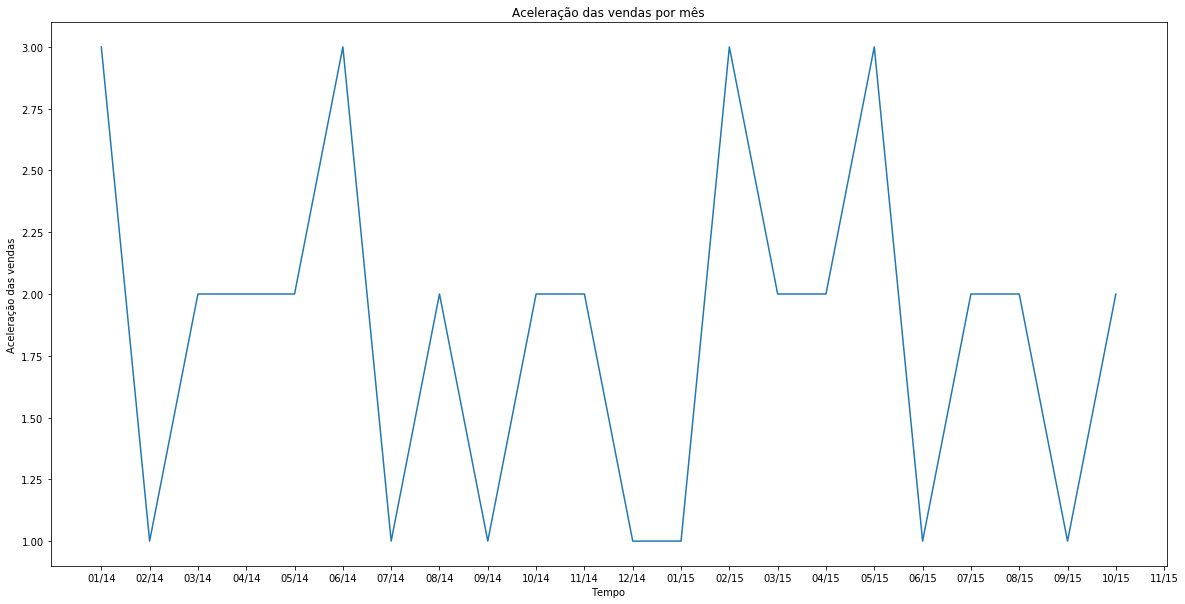

In [76]:
plt.rc('figure', figsize = (20, 10))
plt.title('Aceleração das vendas por mês')
plt.xlabel('Tempo')
plt.ylabel('Aceleração das vendas')
plt.plot(vendas['mes-tratado3'], vendas['Aceleracao das Vendas'])